In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST(
    "", 
    train=True, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)

test = datasets.MNIST(
    "", 
    train=False, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
x = torch.rand((28, 28))
x = x.view([-1, 28 * 28])

In [9]:
output = net(x)
output

tensor([[-2.2245, -2.1276, -2.3348, -2.3475, -2.4026, -2.2893, -2.3311, -2.2040,
         -2.3452, -2.4638]], grad_fn=<LogSoftmaxBackward>)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2077, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor(0.0646, grad_fn=<NllLossBackward>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.979


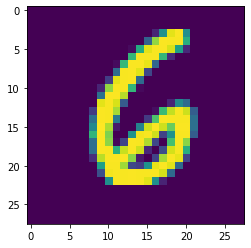

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x[7].view(28, 28))

In [23]:
print(torch.argmax(net(x[7].view(-1, 784))[0]))

tensor(6, grad_fn=<NotImplemented>)
